In [1]:
import math
import torch
import torch.nn as nn
import torch.utils
import torch.utils.data
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt 
from model import VRNN

"""implementation of the Variational Recurrent
Neural Network (VRNN) from https://arxiv.org/abs/1506.02216
using unimodal isotropic gaussian distributions for 
inference, prior, and generating models."""

def train(epoch):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):

        #transforming data
        data = data.to(device)
        data = data.squeeze().transpose(0, 1) # (seq, batch, elem)
        data = (data - data.min()) / (data.max() - data.min())
        #forward + backward + optimize
        optimizer.zero_grad()
        kld_loss, nll_loss, _, _ = model(data)
        loss = kld_loss + nll_loss
        loss.backward()
        optimizer.step()
        #grad norm clipping, only in pytorch version >= 1.10
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        #printing
        if batch_idx % print_every == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\t KLD Loss: {:.6f} \t NLL Loss: {:.6f}'.format(
                epoch, batch_idx * batch_size, batch_size * (len(train_loader.dataset)//batch_size),
                100. * batch_idx / len(train_loader),
                kld_loss / batch_size,
                nll_loss / batch_size))
            
            sample = model.sample(torch.tensor(28, device=device))
            plt.imshow(sample.to(torch.device('cpu')).numpy())
            plt.pause(1e-6)
        train_loss += loss.item()
    print('====> Epoch: {} Average loss: {:.4f}'.format(
        epoch, train_loss / len(train_loader.dataset)))
def test(epoch):
    """uses test data to evaluate 
    likelihood of the model"""

    mean_kld_loss, mean_nll_loss = 0, 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):                                            

            data = data.to(device)
            data = data.squeeze().transpose(0, 1)
            data = (data - data.min()) / (data.max() - data.min())

            kld_loss, nll_loss, _, _ = model(data)
            mean_kld_loss += kld_loss.item()
            mean_nll_loss += nll_loss.item()

    mean_kld_loss /= len(test_loader.dataset)
    mean_nll_loss /= len(test_loader.dataset)
   
    print('====> Test set loss: KLD Loss = {:.4f}, NLL Loss = {:.4f} '.format(
        mean_kld_loss, mean_nll_loss))




Train Epoch: 1 [0/60000 (0%)]	 KLD Loss: 7.711171 	 NLL Loss: 544.660645


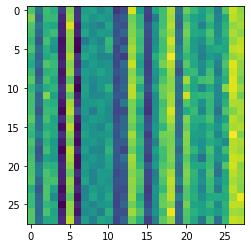

Train Epoch: 1 [8000/60000 (13%)]	 KLD Loss: 3.007436 	 NLL Loss: 92.885574


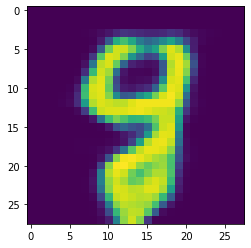

Train Epoch: 1 [16000/60000 (27%)]	 KLD Loss: 2.291320 	 NLL Loss: 83.823776


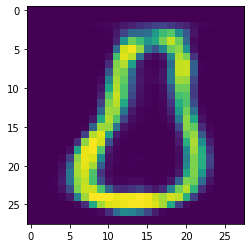

Train Epoch: 1 [24000/60000 (40%)]	 KLD Loss: 3.511660 	 NLL Loss: 83.038811


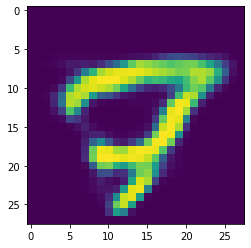

Train Epoch: 1 [32000/60000 (53%)]	 KLD Loss: 2.851454 	 NLL Loss: 97.487503


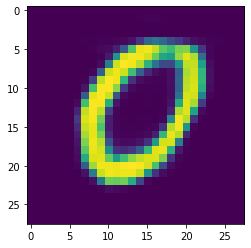

Train Epoch: 1 [40000/60000 (67%)]	 KLD Loss: 2.879606 	 NLL Loss: 72.213326


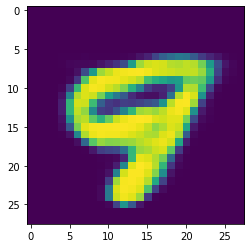

Train Epoch: 1 [48000/60000 (80%)]	 KLD Loss: 3.298164 	 NLL Loss: 84.649506


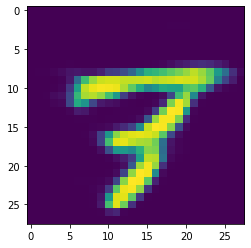

Train Epoch: 1 [56000/60000 (93%)]	 KLD Loss: 3.054451 	 NLL Loss: 84.668144


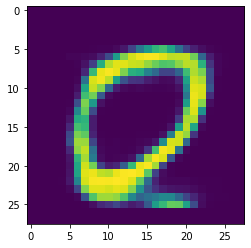

====> Epoch: 1 Average loss: 90.7801
====> Test set loss: KLD Loss = 3.3430, NLL Loss = 76.0812 
Saved model to saves/vrnn_state_dict_1.pth
Train Epoch: 2 [0/60000 (0%)]	 KLD Loss: 3.369266 	 NLL Loss: 80.561928


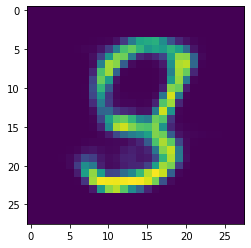

Train Epoch: 2 [8000/60000 (13%)]	 KLD Loss: 2.756444 	 NLL Loss: 74.332710


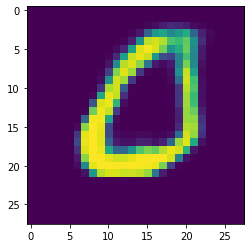

Train Epoch: 2 [16000/60000 (27%)]	 KLD Loss: 4.512309 	 NLL Loss: 92.222527


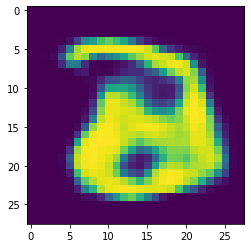

Train Epoch: 2 [24000/60000 (40%)]	 KLD Loss: 3.110287 	 NLL Loss: 77.966225


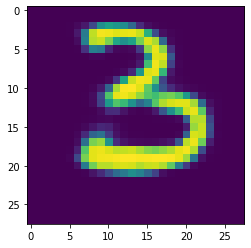

Train Epoch: 2 [32000/60000 (53%)]	 KLD Loss: 3.410306 	 NLL Loss: 72.498161


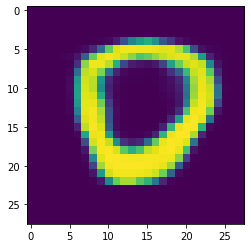

Train Epoch: 2 [40000/60000 (67%)]	 KLD Loss: 4.756433 	 NLL Loss: 72.751579


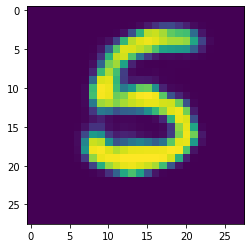

Train Epoch: 2 [48000/60000 (80%)]	 KLD Loss: 3.774210 	 NLL Loss: 78.854416


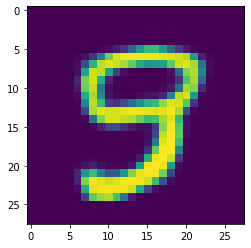

Train Epoch: 2 [56000/60000 (93%)]	 KLD Loss: 4.027556 	 NLL Loss: 86.249870


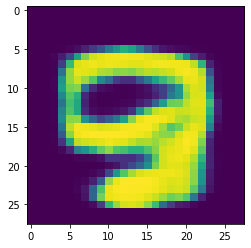

====> Epoch: 2 Average loss: 78.3965
====> Test set loss: KLD Loss = 3.6088, NLL Loss = 72.9924 
Train Epoch: 3 [0/60000 (0%)]	 KLD Loss: 4.065535 	 NLL Loss: 66.868874


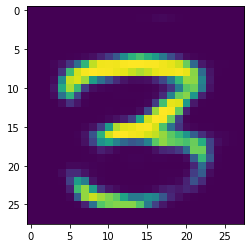

Train Epoch: 3 [8000/60000 (13%)]	 KLD Loss: 3.194596 	 NLL Loss: 71.809822


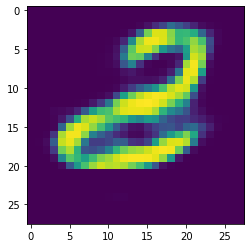

Train Epoch: 3 [16000/60000 (27%)]	 KLD Loss: 3.208516 	 NLL Loss: 75.376053


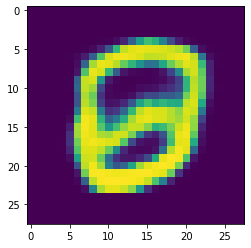

Train Epoch: 3 [24000/60000 (40%)]	 KLD Loss: 3.568242 	 NLL Loss: 77.232956


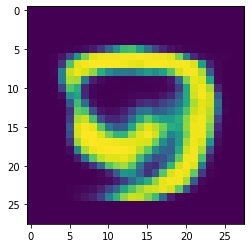

Train Epoch: 3 [32000/60000 (53%)]	 KLD Loss: 3.763090 	 NLL Loss: 75.621986


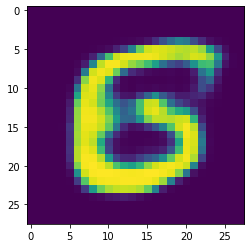

Train Epoch: 3 [40000/60000 (67%)]	 KLD Loss: 4.249095 	 NLL Loss: 82.424408


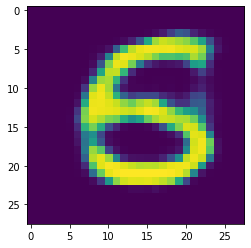

Train Epoch: 3 [48000/60000 (80%)]	 KLD Loss: 3.705936 	 NLL Loss: 72.331970


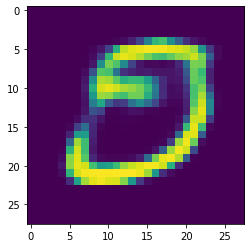

Train Epoch: 3 [56000/60000 (93%)]	 KLD Loss: 3.570578 	 NLL Loss: 65.942131


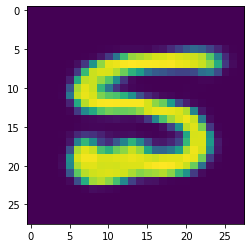

====> Epoch: 3 Average loss: 76.4111
====> Test set loss: KLD Loss = 3.8663, NLL Loss = 71.2680 
Train Epoch: 4 [0/60000 (0%)]	 KLD Loss: 4.254829 	 NLL Loss: 72.228722


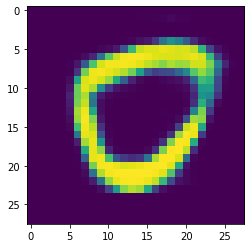

Train Epoch: 4 [8000/60000 (13%)]	 KLD Loss: 3.843583 	 NLL Loss: 70.596390


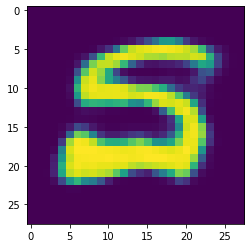

Train Epoch: 4 [16000/60000 (27%)]	 KLD Loss: 4.022799 	 NLL Loss: 68.247093


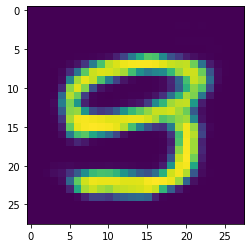

Train Epoch: 4 [24000/60000 (40%)]	 KLD Loss: 3.981358 	 NLL Loss: 54.001282


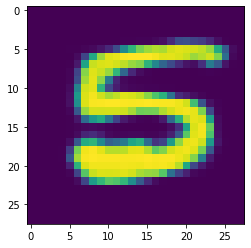

Train Epoch: 4 [32000/60000 (53%)]	 KLD Loss: 2.953212 	 NLL Loss: 70.664360


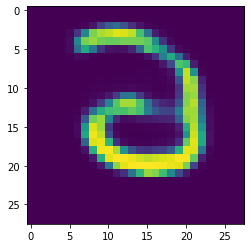

Train Epoch: 4 [40000/60000 (67%)]	 KLD Loss: 3.354313 	 NLL Loss: 63.274334


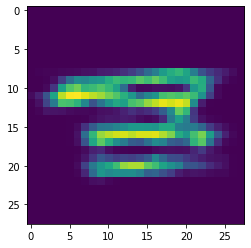

Train Epoch: 4 [48000/60000 (80%)]	 KLD Loss: 3.084873 	 NLL Loss: 73.192627


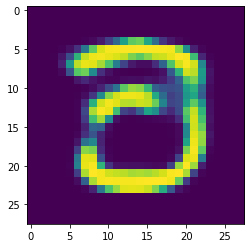

Train Epoch: 4 [56000/60000 (93%)]	 KLD Loss: 3.290730 	 NLL Loss: 68.753845


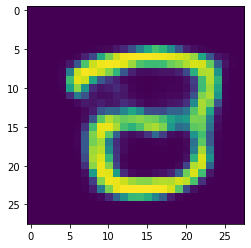

====> Epoch: 4 Average loss: 75.3122
====> Test set loss: KLD Loss = 3.4529, NLL Loss = 70.8206 
Train Epoch: 5 [0/60000 (0%)]	 KLD Loss: 3.627163 	 NLL Loss: 66.843369


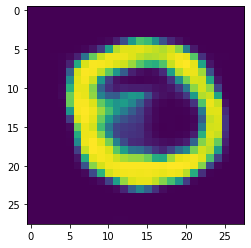

Train Epoch: 5 [8000/60000 (13%)]	 KLD Loss: 5.372670 	 NLL Loss: 91.452759


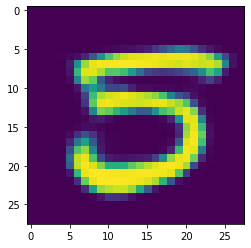

Train Epoch: 5 [16000/60000 (27%)]	 KLD Loss: 3.803424 	 NLL Loss: 68.446815


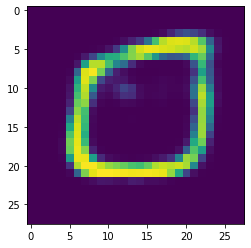

Train Epoch: 5 [24000/60000 (40%)]	 KLD Loss: 3.645352 	 NLL Loss: 72.790535


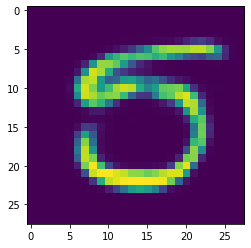

Train Epoch: 5 [32000/60000 (53%)]	 KLD Loss: 3.793960 	 NLL Loss: 74.361153


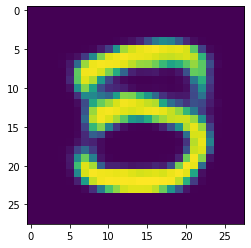

Train Epoch: 5 [40000/60000 (67%)]	 KLD Loss: 4.783878 	 NLL Loss: 80.258598


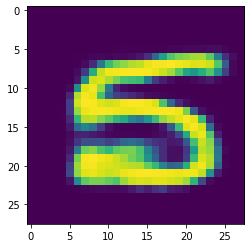

Train Epoch: 5 [48000/60000 (80%)]	 KLD Loss: 3.224526 	 NLL Loss: 74.627785


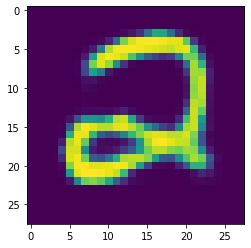

Train Epoch: 5 [56000/60000 (93%)]	 KLD Loss: 4.075768 	 NLL Loss: 68.097649


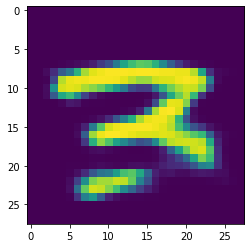

====> Epoch: 5 Average loss: 74.5867
====> Test set loss: KLD Loss = 3.6279, NLL Loss = 69.9786 
Train Epoch: 6 [0/60000 (0%)]	 KLD Loss: 4.173499 	 NLL Loss: 81.391602


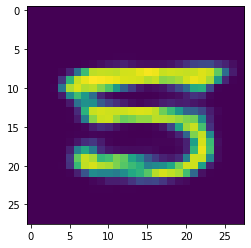

Train Epoch: 6 [8000/60000 (13%)]	 KLD Loss: 4.672165 	 NLL Loss: 70.804222


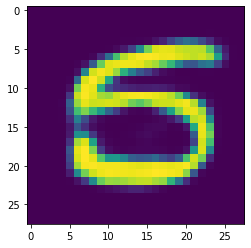

Train Epoch: 6 [16000/60000 (27%)]	 KLD Loss: 3.254238 	 NLL Loss: 64.733971


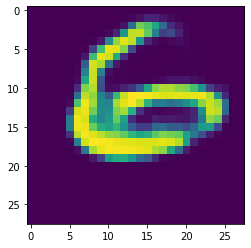

Train Epoch: 6 [24000/60000 (40%)]	 KLD Loss: 3.423439 	 NLL Loss: 75.098427


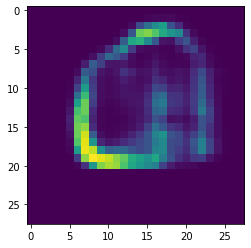

Train Epoch: 6 [32000/60000 (53%)]	 KLD Loss: 3.247103 	 NLL Loss: 73.552231


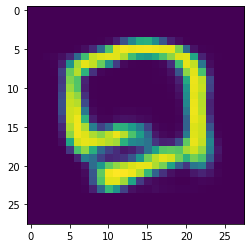

Train Epoch: 6 [40000/60000 (67%)]	 KLD Loss: 3.418555 	 NLL Loss: 69.042549


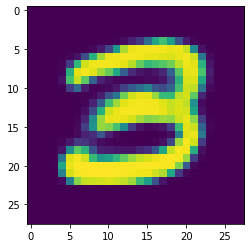

Train Epoch: 6 [48000/60000 (80%)]	 KLD Loss: 4.373525 	 NLL Loss: 70.912361


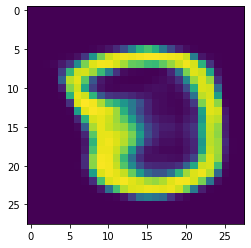

Train Epoch: 6 [56000/60000 (93%)]	 KLD Loss: 3.670703 	 NLL Loss: 75.803261


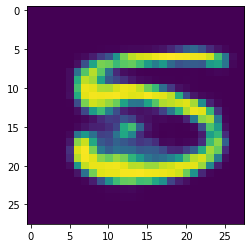

====> Epoch: 6 Average loss: 74.0791
====> Test set loss: KLD Loss = 3.8446, NLL Loss = 70.1348 
Train Epoch: 7 [0/60000 (0%)]	 KLD Loss: 3.484008 	 NLL Loss: 82.244827


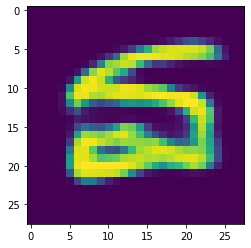

Train Epoch: 7 [8000/60000 (13%)]	 KLD Loss: 4.601437 	 NLL Loss: 81.129250


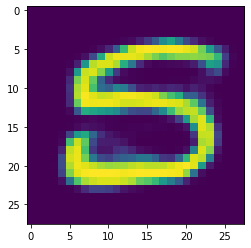

Train Epoch: 7 [16000/60000 (27%)]	 KLD Loss: 3.824081 	 NLL Loss: 63.794823


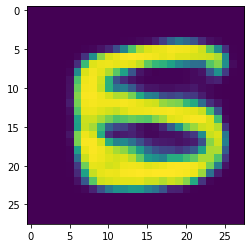

Train Epoch: 7 [24000/60000 (40%)]	 KLD Loss: 4.550057 	 NLL Loss: 78.214928


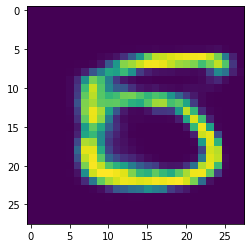

Train Epoch: 7 [32000/60000 (53%)]	 KLD Loss: 3.778608 	 NLL Loss: 62.278877


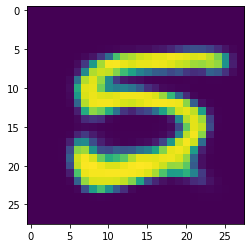

Train Epoch: 7 [40000/60000 (67%)]	 KLD Loss: 3.754707 	 NLL Loss: 67.421249


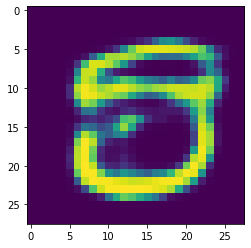

Train Epoch: 7 [48000/60000 (80%)]	 KLD Loss: 3.609932 	 NLL Loss: 67.917480


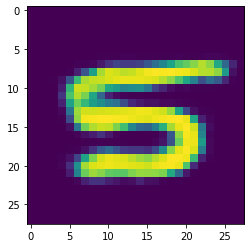

Train Epoch: 7 [56000/60000 (93%)]	 KLD Loss: 3.567986 	 NLL Loss: 63.374416


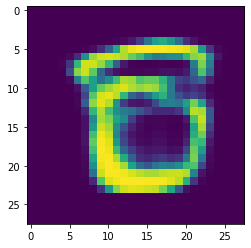

====> Epoch: 7 Average loss: 73.6699
====> Test set loss: KLD Loss = 3.5351, NLL Loss = 69.7185 
Train Epoch: 8 [0/60000 (0%)]	 KLD Loss: 3.140408 	 NLL Loss: 60.620106


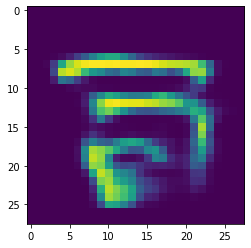

Train Epoch: 8 [8000/60000 (13%)]	 KLD Loss: 3.339793 	 NLL Loss: 68.798347


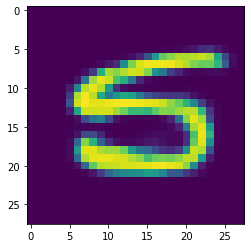

Train Epoch: 8 [16000/60000 (27%)]	 KLD Loss: 3.739928 	 NLL Loss: 68.794830


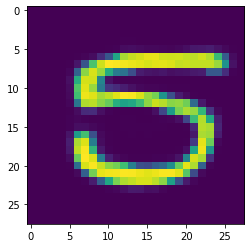

Train Epoch: 8 [24000/60000 (40%)]	 KLD Loss: 3.700043 	 NLL Loss: 67.032555


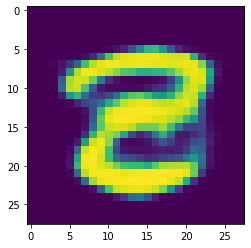

Train Epoch: 8 [32000/60000 (53%)]	 KLD Loss: 4.074894 	 NLL Loss: 73.247360


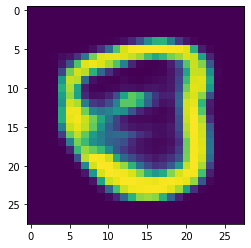

Train Epoch: 8 [40000/60000 (67%)]	 KLD Loss: 4.815231 	 NLL Loss: 71.821602


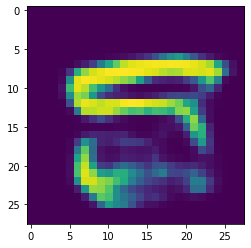

Train Epoch: 8 [48000/60000 (80%)]	 KLD Loss: 4.341974 	 NLL Loss: 71.035980


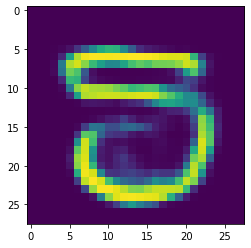

Train Epoch: 8 [56000/60000 (93%)]	 KLD Loss: 3.388365 	 NLL Loss: 68.985771


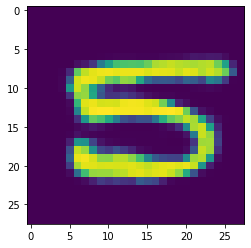

====> Epoch: 8 Average loss: 73.3425
====> Test set loss: KLD Loss = 3.6562, NLL Loss = 69.1462 
Train Epoch: 9 [0/60000 (0%)]	 KLD Loss: 3.241083 	 NLL Loss: 74.578911


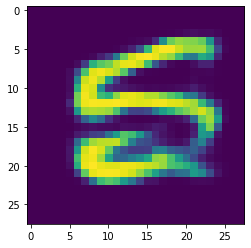

Train Epoch: 9 [8000/60000 (13%)]	 KLD Loss: 4.247579 	 NLL Loss: 79.448730


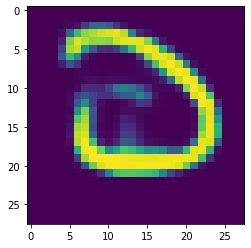

Train Epoch: 9 [16000/60000 (27%)]	 KLD Loss: 3.812033 	 NLL Loss: 71.481094


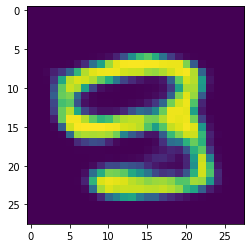

Train Epoch: 9 [24000/60000 (40%)]	 KLD Loss: 3.780001 	 NLL Loss: 72.489128


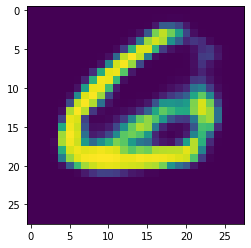

Train Epoch: 9 [32000/60000 (53%)]	 KLD Loss: 3.380676 	 NLL Loss: 72.931923


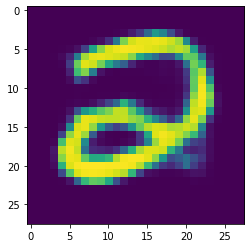

Train Epoch: 9 [40000/60000 (67%)]	 KLD Loss: 3.636322 	 NLL Loss: 73.447220


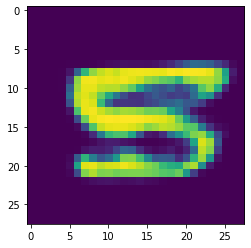

Train Epoch: 9 [48000/60000 (80%)]	 KLD Loss: 3.440235 	 NLL Loss: 71.412949


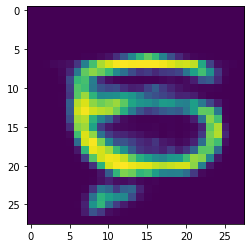

Train Epoch: 9 [56000/60000 (93%)]	 KLD Loss: 3.445822 	 NLL Loss: 65.340187


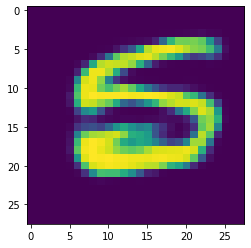

====> Epoch: 9 Average loss: 73.0689
====> Test set loss: KLD Loss = 3.6361, NLL Loss = 68.7750 
Train Epoch: 10 [0/60000 (0%)]	 KLD Loss: 4.341993 	 NLL Loss: 77.288338


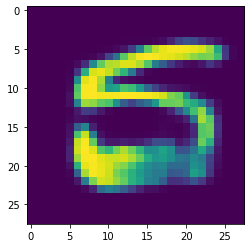

Train Epoch: 10 [8000/60000 (13%)]	 KLD Loss: 3.611037 	 NLL Loss: 66.805817


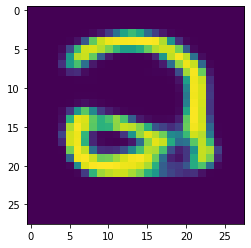

Train Epoch: 10 [16000/60000 (27%)]	 KLD Loss: 4.459152 	 NLL Loss: 60.014263


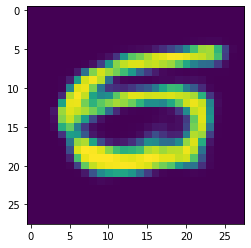

Train Epoch: 10 [24000/60000 (40%)]	 KLD Loss: 3.884182 	 NLL Loss: 71.418083


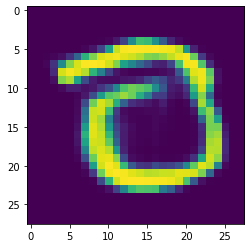

Train Epoch: 10 [32000/60000 (53%)]	 KLD Loss: 3.019244 	 NLL Loss: 57.461544


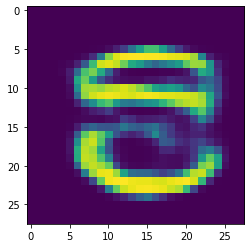

Train Epoch: 10 [40000/60000 (67%)]	 KLD Loss: 2.983300 	 NLL Loss: 65.850624


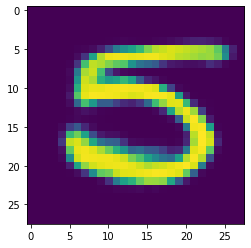

Train Epoch: 10 [48000/60000 (80%)]	 KLD Loss: 3.344403 	 NLL Loss: 64.985977


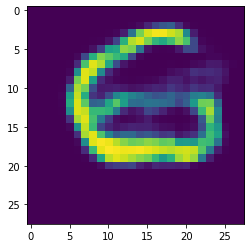

Train Epoch: 10 [56000/60000 (93%)]	 KLD Loss: 2.530740 	 NLL Loss: 54.617439


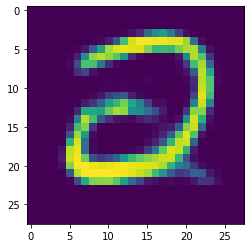

====> Epoch: 10 Average loss: 72.8839
====> Test set loss: KLD Loss = 3.5608, NLL Loss = 68.7642 
Train Epoch: 11 [0/60000 (0%)]	 KLD Loss: 2.971030 	 NLL Loss: 64.676338


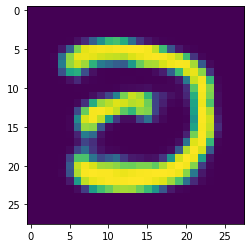

Train Epoch: 11 [8000/60000 (13%)]	 KLD Loss: 4.765831 	 NLL Loss: 73.379463


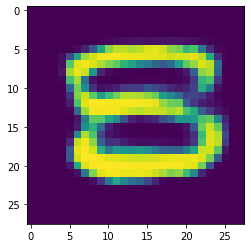

Train Epoch: 11 [16000/60000 (27%)]	 KLD Loss: 5.553059 	 NLL Loss: 72.517471


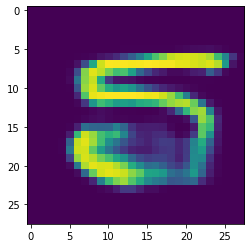

Train Epoch: 11 [24000/60000 (40%)]	 KLD Loss: 3.912222 	 NLL Loss: 65.312988


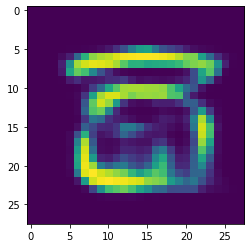

Train Epoch: 11 [32000/60000 (53%)]	 KLD Loss: 4.041912 	 NLL Loss: 71.344353


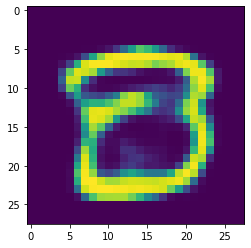

Train Epoch: 11 [40000/60000 (67%)]	 KLD Loss: 3.520231 	 NLL Loss: 73.348015


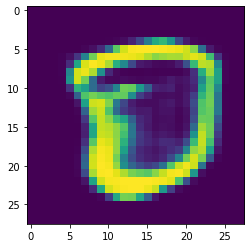

Train Epoch: 11 [48000/60000 (80%)]	 KLD Loss: 4.330468 	 NLL Loss: 70.541649


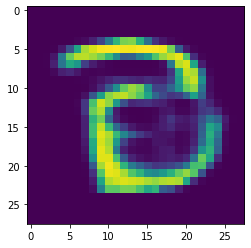

Train Epoch: 11 [56000/60000 (93%)]	 KLD Loss: 3.492003 	 NLL Loss: 69.638023


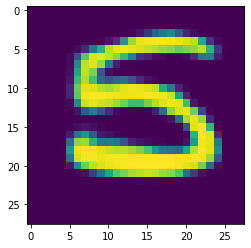

====> Epoch: 11 Average loss: 72.6551
====> Test set loss: KLD Loss = 3.5527, NLL Loss = 68.8306 
Train Epoch: 12 [0/60000 (0%)]	 KLD Loss: 2.735456 	 NLL Loss: 65.253487


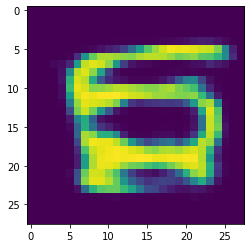

Train Epoch: 12 [8000/60000 (13%)]	 KLD Loss: 3.905700 	 NLL Loss: 65.915421


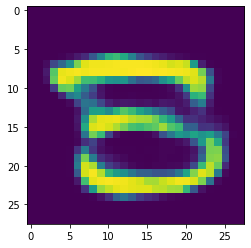

Train Epoch: 12 [16000/60000 (27%)]	 KLD Loss: 3.700762 	 NLL Loss: 68.491249


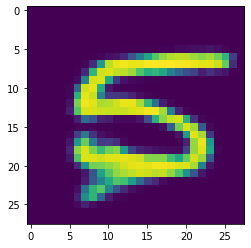

Train Epoch: 12 [24000/60000 (40%)]	 KLD Loss: 2.844664 	 NLL Loss: 53.619259


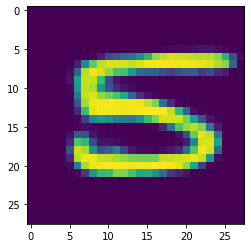

Train Epoch: 12 [32000/60000 (53%)]	 KLD Loss: 2.378288 	 NLL Loss: 62.059059


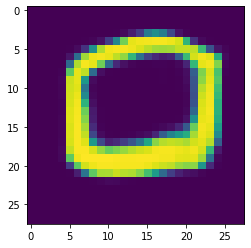

Train Epoch: 12 [40000/60000 (67%)]	 KLD Loss: 3.032226 	 NLL Loss: 70.649734


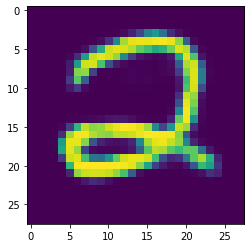

Train Epoch: 12 [48000/60000 (80%)]	 KLD Loss: 4.424598 	 NLL Loss: 67.091774


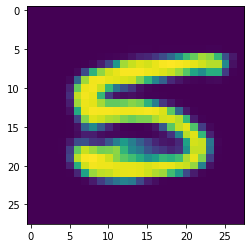

Train Epoch: 12 [56000/60000 (93%)]	 KLD Loss: 3.690549 	 NLL Loss: 79.502693


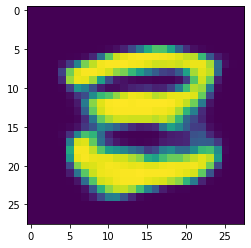

====> Epoch: 12 Average loss: 72.5270
====> Test set loss: KLD Loss = 3.9486, NLL Loss = 68.1885 
Train Epoch: 13 [0/60000 (0%)]	 KLD Loss: 3.841249 	 NLL Loss: 64.522179


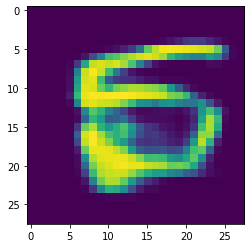

Train Epoch: 13 [8000/60000 (13%)]	 KLD Loss: 3.449282 	 NLL Loss: 73.929314


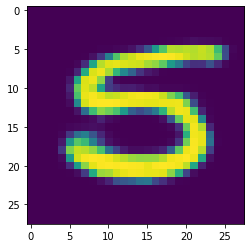

Train Epoch: 13 [16000/60000 (27%)]	 KLD Loss: 3.836535 	 NLL Loss: 73.585419


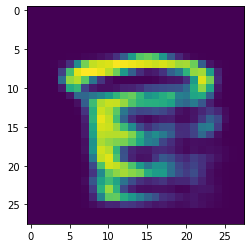

Train Epoch: 13 [24000/60000 (40%)]	 KLD Loss: 3.586729 	 NLL Loss: 68.275177


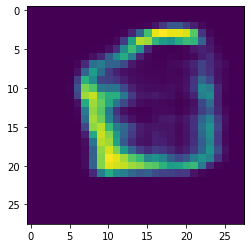

Train Epoch: 13 [32000/60000 (53%)]	 KLD Loss: 4.434886 	 NLL Loss: 70.778763


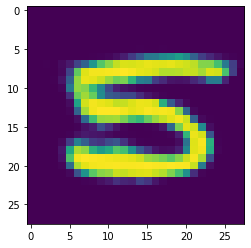

Train Epoch: 13 [40000/60000 (67%)]	 KLD Loss: 2.893897 	 NLL Loss: 54.019684


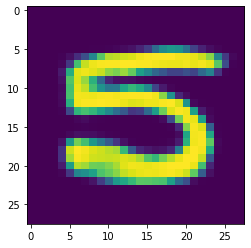

Train Epoch: 13 [48000/60000 (80%)]	 KLD Loss: 3.765798 	 NLL Loss: 76.044518


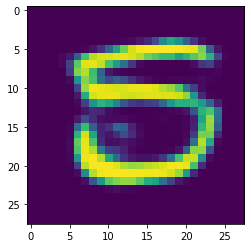

Train Epoch: 13 [56000/60000 (93%)]	 KLD Loss: 3.208622 	 NLL Loss: 79.115593


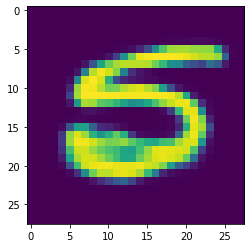

====> Epoch: 13 Average loss: 72.3378
====> Test set loss: KLD Loss = 3.7024, NLL Loss = 68.2455 
Train Epoch: 14 [0/60000 (0%)]	 KLD Loss: 3.675846 	 NLL Loss: 69.476822


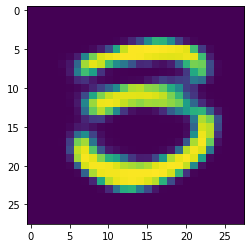

Train Epoch: 14 [8000/60000 (13%)]	 KLD Loss: 3.906245 	 NLL Loss: 65.119347


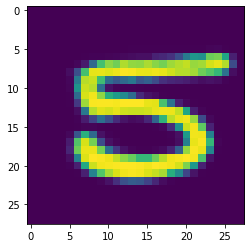

Train Epoch: 14 [16000/60000 (27%)]	 KLD Loss: 4.260744 	 NLL Loss: 86.415031


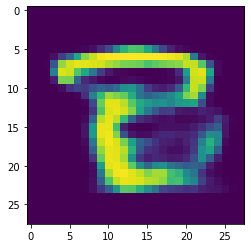

Train Epoch: 14 [24000/60000 (40%)]	 KLD Loss: 3.348277 	 NLL Loss: 69.358383


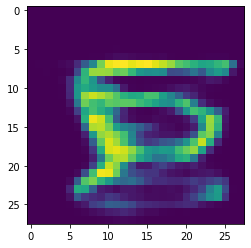

Train Epoch: 14 [32000/60000 (53%)]	 KLD Loss: 4.160998 	 NLL Loss: 64.135956


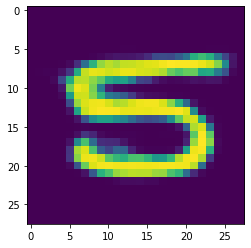

Train Epoch: 14 [40000/60000 (67%)]	 KLD Loss: 3.305542 	 NLL Loss: 65.262672


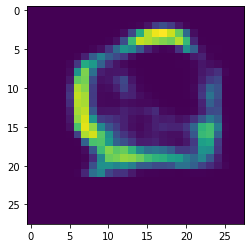

Train Epoch: 14 [48000/60000 (80%)]	 KLD Loss: 2.860585 	 NLL Loss: 60.100239


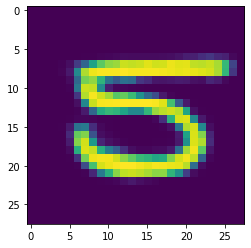

Train Epoch: 14 [56000/60000 (93%)]	 KLD Loss: 2.487732 	 NLL Loss: 58.967789


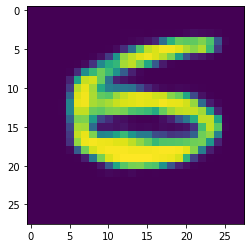

====> Epoch: 14 Average loss: 72.2066
====> Test set loss: KLD Loss = 3.7205, NLL Loss = 68.1171 
Train Epoch: 15 [0/60000 (0%)]	 KLD Loss: 3.927147 	 NLL Loss: 69.656631


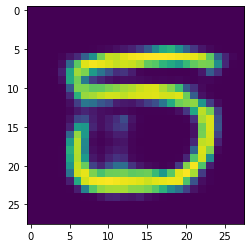

Train Epoch: 15 [8000/60000 (13%)]	 KLD Loss: 3.666987 	 NLL Loss: 66.522453


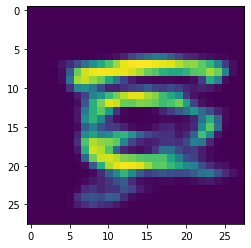

Train Epoch: 15 [16000/60000 (27%)]	 KLD Loss: 4.047193 	 NLL Loss: 74.182770


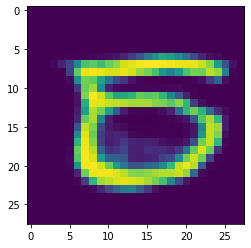

Train Epoch: 15 [24000/60000 (40%)]	 KLD Loss: 3.270982 	 NLL Loss: 76.113640


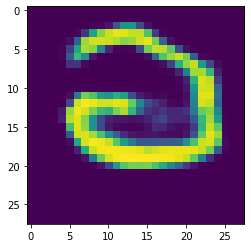

Train Epoch: 15 [32000/60000 (53%)]	 KLD Loss: 3.568429 	 NLL Loss: 71.659943


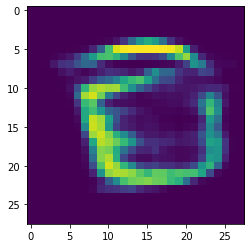

Train Epoch: 15 [40000/60000 (67%)]	 KLD Loss: 3.579850 	 NLL Loss: 70.726723


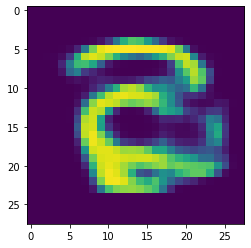

Train Epoch: 15 [48000/60000 (80%)]	 KLD Loss: 3.718426 	 NLL Loss: 74.661896


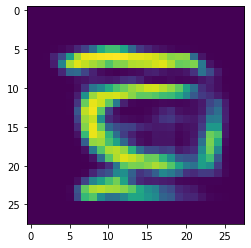

Train Epoch: 15 [56000/60000 (93%)]	 KLD Loss: 4.133534 	 NLL Loss: 79.335121


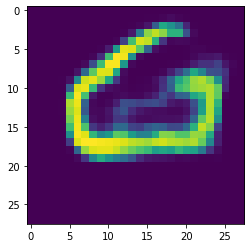

====> Epoch: 15 Average loss: 72.1118
====> Test set loss: KLD Loss = 3.4741, NLL Loss = 68.2028 
Train Epoch: 16 [0/60000 (0%)]	 KLD Loss: 4.020864 	 NLL Loss: 76.476891


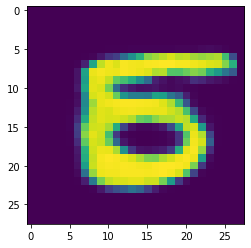

Train Epoch: 16 [8000/60000 (13%)]	 KLD Loss: 4.050100 	 NLL Loss: 65.269638


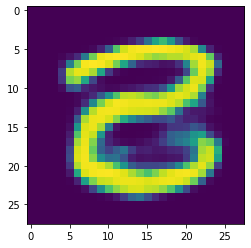

Train Epoch: 16 [16000/60000 (27%)]	 KLD Loss: 3.887552 	 NLL Loss: 64.456764


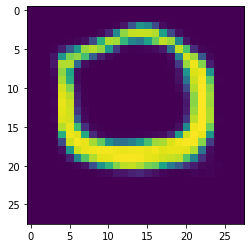

Train Epoch: 16 [24000/60000 (40%)]	 KLD Loss: 3.405108 	 NLL Loss: 66.324005


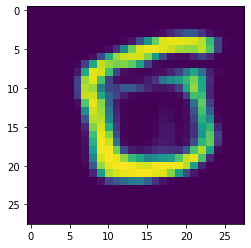

Train Epoch: 16 [32000/60000 (53%)]	 KLD Loss: 3.707128 	 NLL Loss: 63.985737


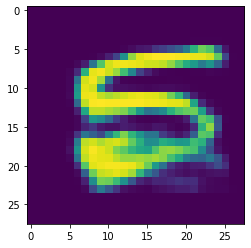

Train Epoch: 16 [40000/60000 (67%)]	 KLD Loss: 3.807343 	 NLL Loss: 67.382431


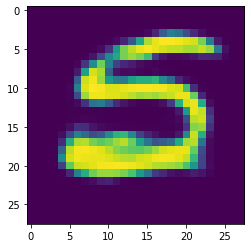

Train Epoch: 16 [48000/60000 (80%)]	 KLD Loss: 3.314955 	 NLL Loss: 68.449783


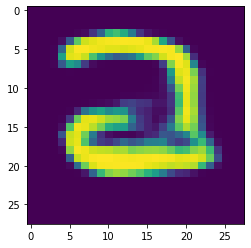

Train Epoch: 16 [56000/60000 (93%)]	 KLD Loss: 3.080238 	 NLL Loss: 62.291622


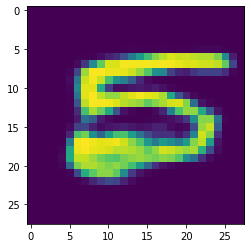

====> Epoch: 16 Average loss: 72.0316
====> Test set loss: KLD Loss = 3.5848, NLL Loss = 68.3649 
Train Epoch: 17 [0/60000 (0%)]	 KLD Loss: 4.076001 	 NLL Loss: 68.930382


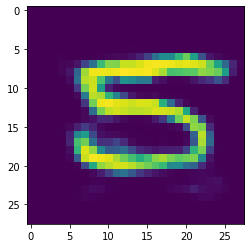

Train Epoch: 17 [8000/60000 (13%)]	 KLD Loss: 2.746736 	 NLL Loss: 57.754841


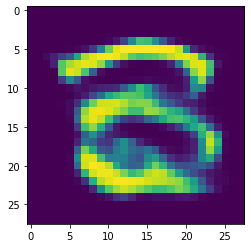

Train Epoch: 17 [16000/60000 (27%)]	 KLD Loss: 3.602611 	 NLL Loss: 59.930359


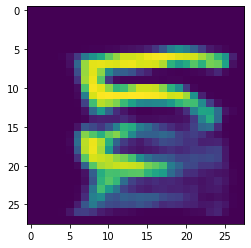

Train Epoch: 17 [24000/60000 (40%)]	 KLD Loss: 3.007691 	 NLL Loss: 77.872368


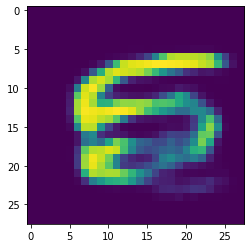

Train Epoch: 17 [32000/60000 (53%)]	 KLD Loss: 3.943259 	 NLL Loss: 63.319706


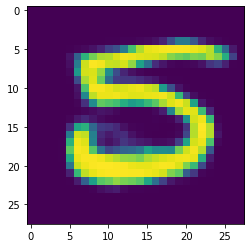

Train Epoch: 17 [40000/60000 (67%)]	 KLD Loss: 2.555551 	 NLL Loss: 72.469933


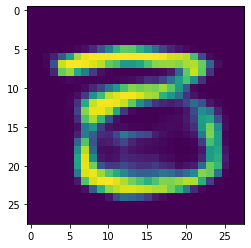

Train Epoch: 17 [48000/60000 (80%)]	 KLD Loss: 3.193840 	 NLL Loss: 68.242836


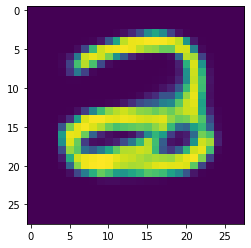

Train Epoch: 17 [56000/60000 (93%)]	 KLD Loss: 3.881486 	 NLL Loss: 74.401604


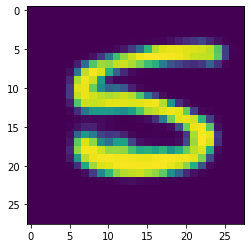

====> Epoch: 17 Average loss: 71.9007
====> Test set loss: KLD Loss = 3.5856, NLL Loss = 67.8661 
Train Epoch: 18 [0/60000 (0%)]	 KLD Loss: 3.122405 	 NLL Loss: 61.019241


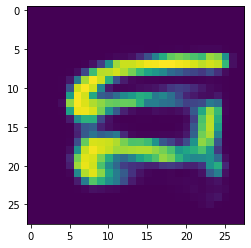

Train Epoch: 18 [8000/60000 (13%)]	 KLD Loss: 3.564256 	 NLL Loss: 73.615387


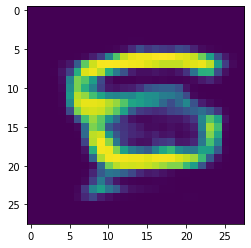

Train Epoch: 18 [16000/60000 (27%)]	 KLD Loss: 4.428780 	 NLL Loss: 66.559708


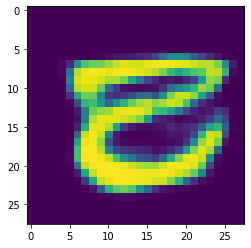

Train Epoch: 18 [24000/60000 (40%)]	 KLD Loss: 4.543847 	 NLL Loss: 74.057404


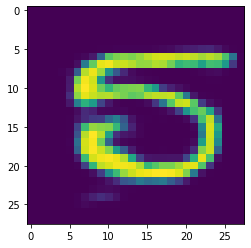

Train Epoch: 18 [32000/60000 (53%)]	 KLD Loss: 3.822109 	 NLL Loss: 64.329330


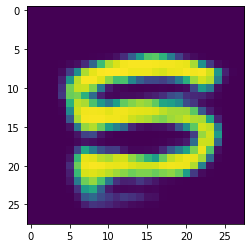

In [ ]:
# changing device
if torch.cuda.is_available():
    device = torch.device('cuda')
    torch.cuda.empty_cache()
else:
    device = torch.device('cpu')

#hyperparameters
x_dim = 28
h_dim = 100
z_dim = 16
n_layers =  1
n_epochs = 25
clip = 10
learning_rate = 1e-3
batch_size = 8 #128
seed = 128
print_every = 1000 # batches
save_every = 1000 # epochs

#manual seed
torch.manual_seed(seed)
plt.ion()

#init model + optimizer + datasets

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
        transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, 
        transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)

model = VRNN(x_dim, h_dim, z_dim, n_layers)
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(1, n_epochs + 1):
    #training + testing
    train(epoch)
    test(epoch)
    #saving model
    if epoch % save_every == 1:
        fn = 'saves/vrnn_state_dict_'+str(epoch)+'.pth'
        torch.save(model.state_dict(), fn)
        print('Saved model to '+fn)